In [1]:
import pySensor
from pylab import *
import os
import matplotlib
%load_ext autoreload
%autoreload 2
%matplotlib inline
#default plotting parameters
params = {'legend.fontsize': 12,
          'figure.figsize': (12, 6),
         'axes.labelsize': 18,
         'axes.titlesize': 20,
         'xtick.labelsize':12,
         'ytick.labelsize':12,
         'lines.linewidth':2}
matplotlib.rcParams.update(params)


# User Inputs

In [3]:
Donor_Name='Cerulean'
Acceptor_Name='Venus'
FRET_Standard_Name='C5V'
Donor_QY=.62
Acceptor_QY=.57
Excitation_1=405
Excitation_2=458
Emission_Start=416
Emission_End=718
Emission_Channels=32
Interpolation=[512,512]    #False for no interpolation
Register_to_Ex1=False      #True if masks are drawn using excitation 1 images
Central_Tendency='median'  #'mean' can also be used


# Initialize Calibration Object

Keyword Arguments:
>D_name=string: Donor Fluorophore Name

>A_name=string: Acceptor Fluorophore Name

>FS_name=string: Name of the FRET standard or other known 1:1 tandem construct

>Qd=float: Quantum yield of the Donor Fluorophore

>Qa=float: Quantum yield of the Acceptor Fluorophore

>ex1=int: wavelength of the laser used for the first excitation image

>ex2=int: wavelength of the laser used for the second excitation image

>multicomp=boolean: option for using separate fluorophore fitting components for excitation 1 and 2 (needed if the component shapes appreciably change between the excitation frequencies, physically the emission should be independent of excitation but external factors such as the filtersets used can modify the shape)

>em_start=int: wavelength for the first emission channel

>em_stop=int: wavelength for the last emission channel

>em_channels=int: number of emission channels

In [4]:
C=pySensor.FRET_Calib(D_name=Donor_Name,A_name=Acceptor_Name,FS_name=FRET_Standard_Name,
                      Qd=Donor_QY,Qa=Acceptor_QY,ex1=Excitation_1,ex2=Excitation_2,
                      em_start=Emission_Start,em_stop=Emission_End,em_channels=Emission_Channels)

# Parse Directory Names and Save for reading .tifs and Plotting Methods

The following cell recursively reads directories in 'Grouped Tiffs' folder to get all the image filenames for importing
            
Directories must be structured as such:
            
> Calibration Inputs
>> Acceptor
>>> Frequency 1
>>>> F1 tifs (multi channel spectral images)

>>> Frequency 2
>>>> F2 tifs (multi channel spectral images)

>>> Masks
>>>> Mask tifs (single channel binary images)


>> AutoF
>>> ...

>> Donor
>>> ...

>> Tandem Construct
>>> ...

Keyword Arguments:
> 'print_names=True' prints the names of all images for you to check

In [5]:
C.get_nested_subdirectories(print_names=True)


Venus_405_01.tif
Venus_405_02.tif
Venus_405_03.tif
Venus_405_04.tif
Venus_458_01.tif
Venus_458_02.tif
Venus_458_03.tif
Venus_458_04.tif
MAX_Venus_405_01.tif
MAX_Venus_405_02.tif
MAX_Venus_405_03.tif
MAX_Venus_405_04.tif
MAX_Venus_458_01.tif
MAX_Venus_458_02.tif
MAX_Venus_458_03.tif
MAX_Venus_458_04.tif
AF_HighPower_405_01.tif
AF_HighPower_405_02.tif
AF_HighPower_458_01.tif
AF_HighPower_458_02.tif
MAX_AF_HighPower_405_01.tif
MAX_AF_HighPower_405_02.tif
MAX_AF_HighPower_458_01.tif
MAX_AF_HighPower_458_02.tif
Cerulean_405_01.tif
Cerulean_405_02.tif
Cerulean_405_03.tif
Cerulean_405_04.tif
Cerulean_458_01.tif
Cerulean_458_02.tif
Cerulean_458_03.tif
Cerulean_458_04.tif
MAX_Cerulean_405_01.tif
MAX_Cerulean_405_02.tif
MAX_Cerulean_405_03.tif
MAX_Cerulean_405_04.tif
MAX_Cerulean_458_01.tif
MAX_Cerulean_458_02.tif
MAX_Cerulean_458_03.tif
MAX_Cerulean_458_04.tif
C5V_405_01.tif
C5V_405_02.tif
C5V_405_03.tif
C5V_405_04.tif
C5V_458_01.tif
C5V_458_02.tif
C5V_458_03.tif
C5V_458_04.tif
MAX_C5V_405_01.t

# All Image Data is Read into Calibration Object
All spectral images, Masks1, and Masks2 data is read into the tif_array attribute of FRET_Calib. 

In [6]:
C.get_tif_container(interpolation=Interpolation)


Number of Channels in Image Do Not Match Specified Emission Channels. Could be due to extra transmission channel or incorrect specification of the number of emission channels. This will default to the specified number of emission channel



# Register Images 

In [7]:
C.register_images(to_F1=Register_to_Ex1)


('Y: 0.000', 'X: 0.000')
('Y: 0.000', 'X: 0.000')
('Y: -1.000', 'X: 0.000')
('Y: 0.000', 'X: 0.000')
_____________
('Y: 0.000', 'X: 0.000')
('Y: 0.000', 'X: 0.000')
_____________
('Y: 0.000', 'X: 0.000')
('Y: 0.000', 'X: 0.000')
('Y: 0.000', 'X: 0.000')
('Y: 0.000', 'X: 0.000')
_____________
('Y: 0.000', 'X: 1.000')
('Y: 0.000', 'X: 0.000')
('Y: 0.000', 'X: 0.000')
('Y: 0.000', 'X: 0.000')
_____________



# Sort Image Data

This step sorts only the masked pixels and labels each pixel spectra with which group, image, and region it is part of along with its x and y location. Since the masked regions are typically small compared to the whole image this greatly reduces the file size and memory usage because all of the pixels outside of the mask dont need to be saved.

In [8]:
C.sort_tif_container(central_tendency=Central_Tendency)
C.group_DF.T


Total Pixels: 74511
Total Regions: 156
Total Images: 14
Total Groups: 4


//anaconda/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:689: RuntimeWarning: All-NaN slice encountered
  warnings.warn("All-NaN slice encountered", RuntimeWarning)
//anaconda/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:740: RuntimeWarning: All-NaN slice encountered
  warnings.warn("All-NaN slice encountered", RuntimeWarning)


,0,1,2,3
label,Acceptor,AutoF,Donor,FRET_Standard
area,5083,18156,28277,22995
group,0,1,2,3
image,4,2,4,4
region,39,11,60,46
spectra1,"[415.721557617, 8207.01269531, 1358.62329102, ...","[519.75592041, 9498.99072266, 3260.62353516, 1...","[432.296875, 8039.90722656, 1611.22680664, 682...","[418.231811523, 8041.69628906, 1416.32800293, ..."
spectra2,"[47.2323188782, 29.9253368378, 45.9667205811, ...","[42.2352523804, 28.2860393524, 28.1587810516, ...","[52.874294281, 32.8152770996, 104.699310303, 9...","[48.1201858521, 30.4133834839, 57.9826087952, ..."
x_loc,266,49,222,236
y_loc,147,48.5,227,214


# Create Calibration Components:
Using the average of all pixels, unmixing components are generated for both excitation frequencies. The plot below shows the components that will be saved in the calibration file used to unmix experimental spectra. 

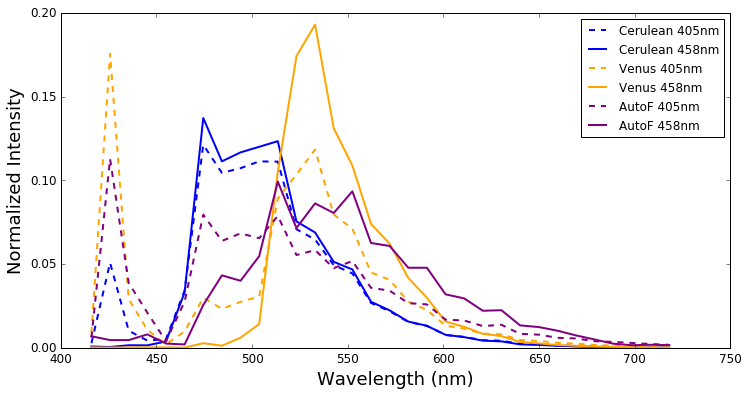

Fit using excitation dependent components? (True or False) False
Which excitation should determine donor shape? (1=405nm,2=458nm) 2
Which excitation should determine acceptor shape? (1=405nm,2=458nm) 2


In [9]:
C.create_components()


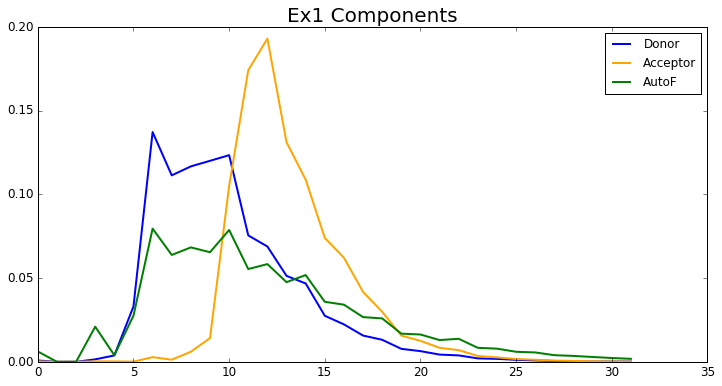

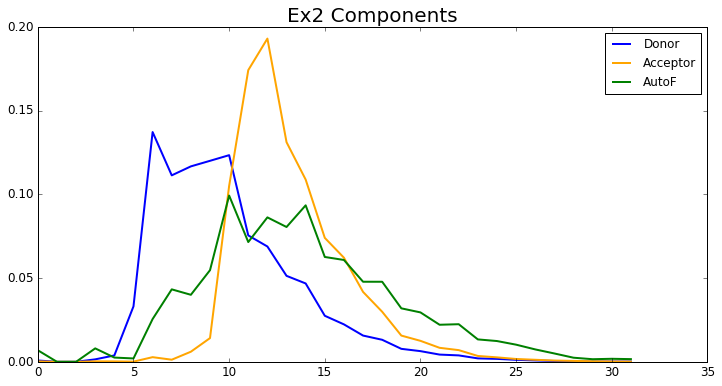

In [10]:
C.remCompChannels(ex=1,component='all',ind=[1,2])
C.remCompChannels(ex=2,component='all',ind=[1,2])

# Unmix DataFrames
Sort tif container creates four different observation DataFrames. The unmix_DF method will apply the SensorFRET algorithm to each observation in all four DataFrames. This may take several minutes to complete

In [11]:
C.unmix_DF(observation='all')
C.group_DF.T


,0,1,2,3
label,Acceptor,AutoF,Donor,FRET_Standard
area,5083,18156,28277,22995
group,0,1,2,3
image,4,2,4,4
region,39,11,60,46
spectra1,"[415.721557617, 8207.01269531, 1358.62329102, ...","[519.75592041, 9498.99072266, 3260.62353516, 1...","[432.296875, 8039.90722656, 1611.22680664, 682...","[418.231811523, 8041.69628906, 1416.32800293, ..."
spectra2,"[47.2323188782, 29.9253368378, 45.9667205811, ...","[42.2352523804, 28.2860393524, 28.1587810516, ...","[52.874294281, 32.8152770996, 104.699310303, 9...","[48.1201858521, 30.4133834839, 57.9826087952, ..."
x_loc,266,49,222,236
y_loc,147,48.5,227,214
D_D1,-30750.8,-3.05234e-11,136225,-23461.6


In [12]:
C.default_calculations()
C.group_DF.T


Gamma: 0.0611735350447
eD/eA (freq1): 35.6985980283
eD/eA (freq2): 2.18380943753


,0,1,2,3
label,Acceptor,AutoF,Donor,FRET_Standard
area,5083,18156,28277,22995
group,0,1,2,3
image,4,2,4,4
region,39,11,60,46
spectra1,"[415.721557617, 8207.01269531, 1358.62329102, ...","[519.75592041, 9498.99072266, 3260.62353516, 1...","[432.296875, 8039.90722656, 1611.22680664, 682...","[418.231811523, 8041.69628906, 1416.32800293, ..."
spectra2,"[47.2323188782, 29.9253368378, 45.9667205811, ...","[42.2352523804, 28.2860393524, 28.1587810516, ...","[52.874294281, 32.8152770996, 104.699310303, 9...","[48.1201858521, 30.4133834839, 57.9826087952, ..."
x_loc,266,49,222,236
y_loc,147,48.5,227,214
D_D1,-30750.8,-3.05234e-11,136225,-23461.6


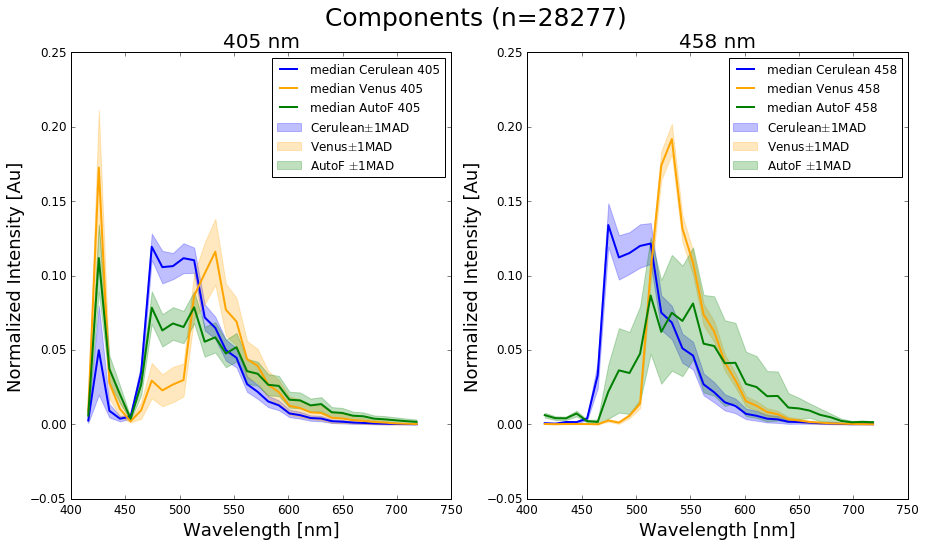

In [13]:
C.plotComps(observation='pixel',specify=[],colors=[],update_values=False)



D2/D1: 0.515153292981
A1/A2: 0.119027633329
Gamma: 0.0613174772653


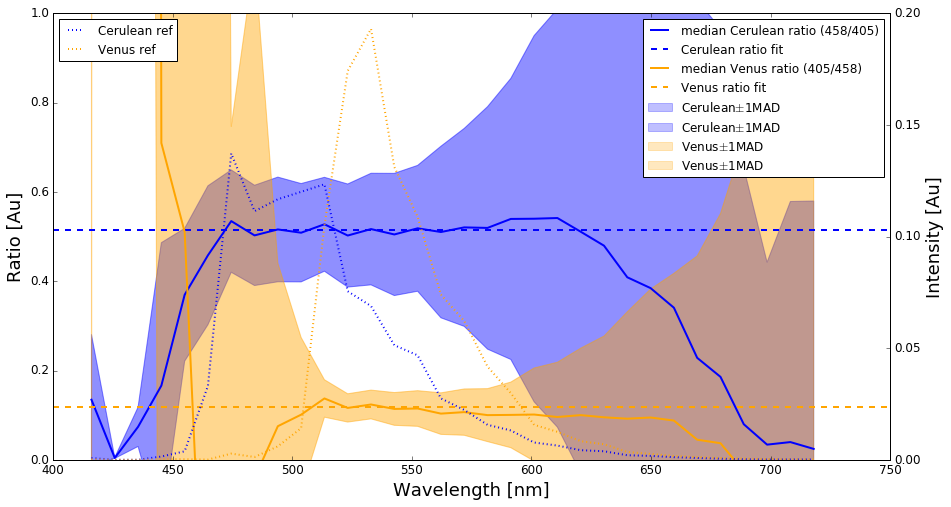

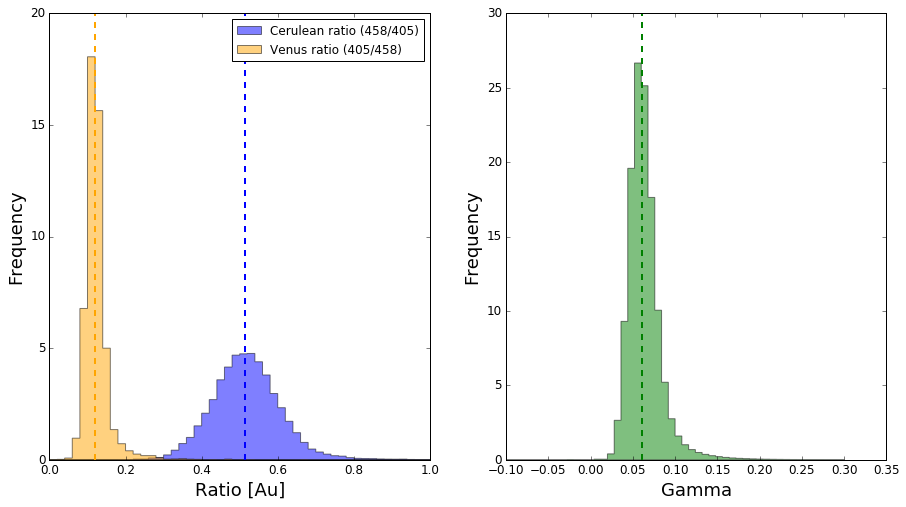

In [14]:
C.plotGamma(observation='pixel',specify=[],colors=[],
            spec_range=(0,1),g_range=(-.1,.3),ratio_range=(0,1),update_values=False)


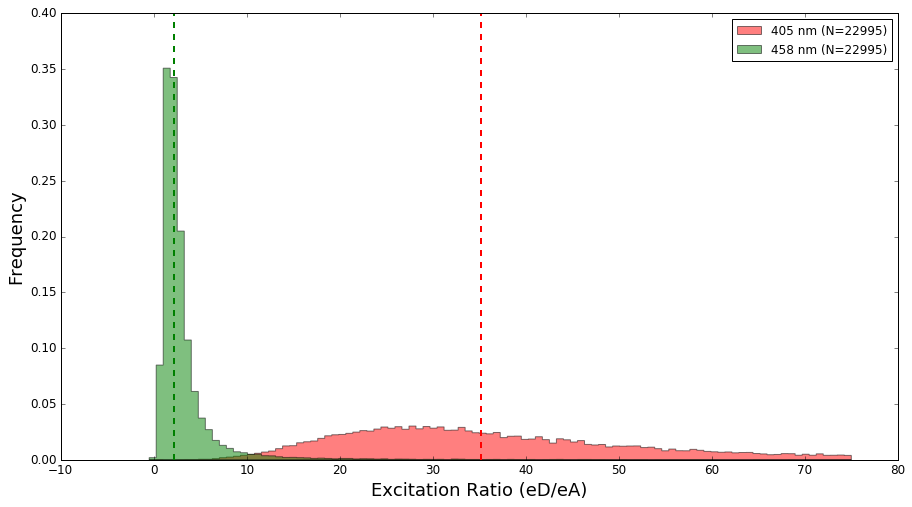

Excitation Ratio (405 nm):35.1509733669
Excitation Ratio (458 nm):2.15030930111


In [17]:
C.plotExRatios(observation='pixel',specify=[],colors=[],
               ratio_range=(-.5,75),bins=100,update_values=False)


Getting Figure Sets
---------------------------------------------------------------------------------

Generating Plots
---------------------------------------------------------------------------------



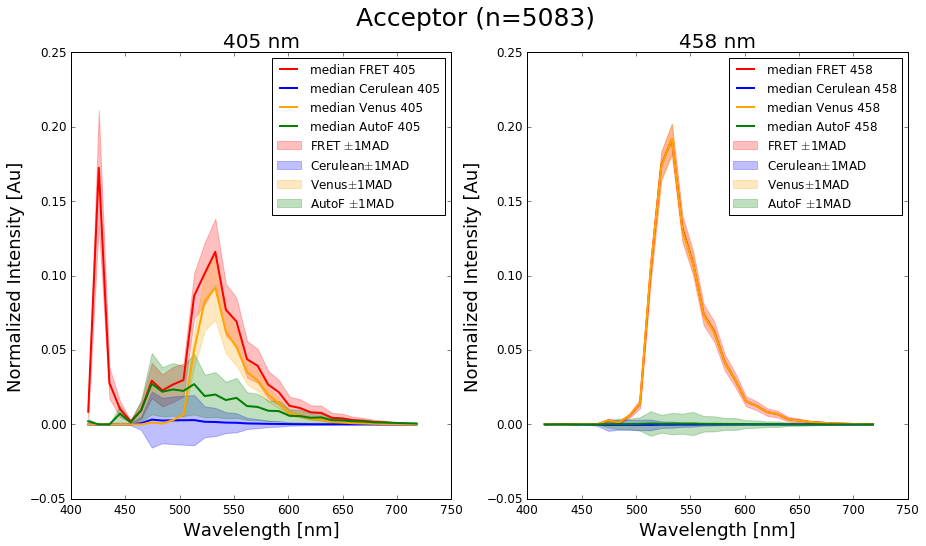

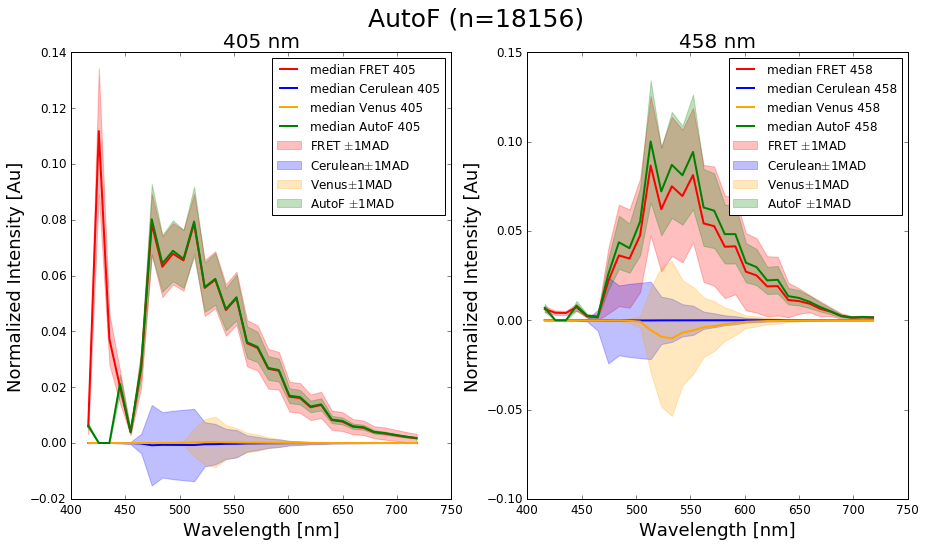

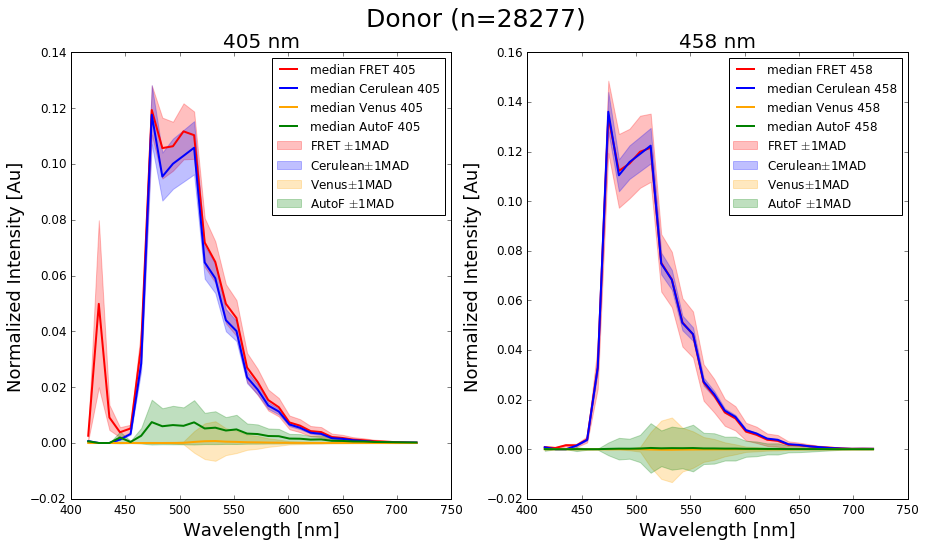

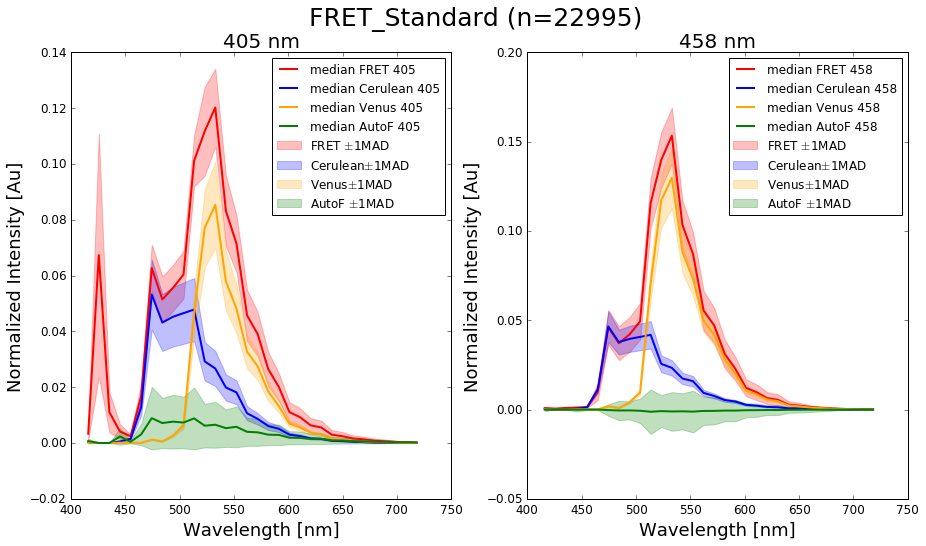

In [18]:
C.spectraFit(norm=True,observation='pixel',plot_by='group',specify=[])


Getting Figure Sets
---------------------------------------------------------------------------------

Generating Plots
---------------------------------------------------------------------------------



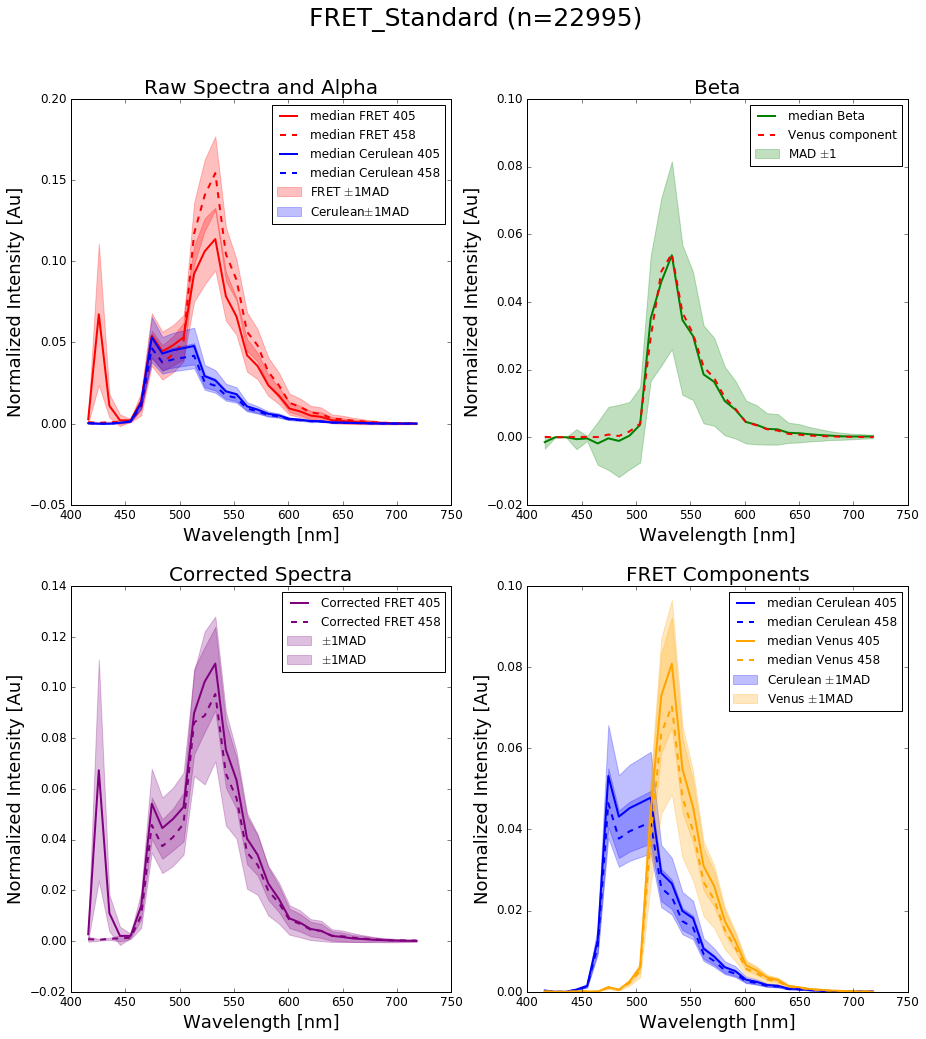

In [20]:
C.plotFRETvariance(observation='pix',plot_by='group', specify=[['group','=',[3]]])


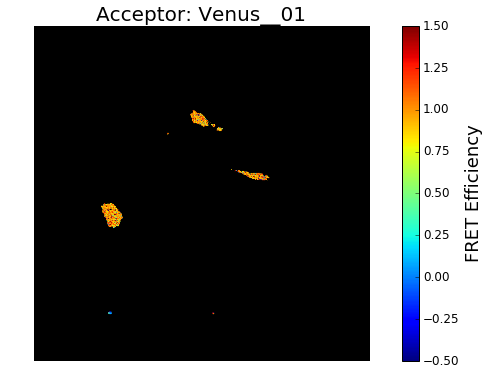

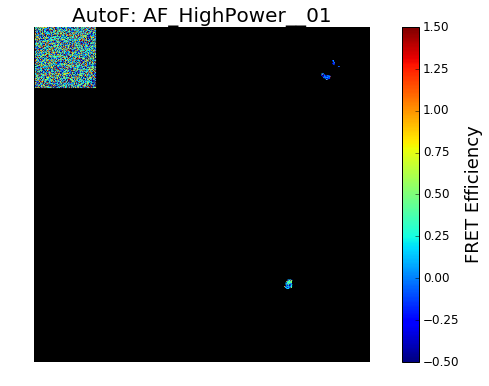

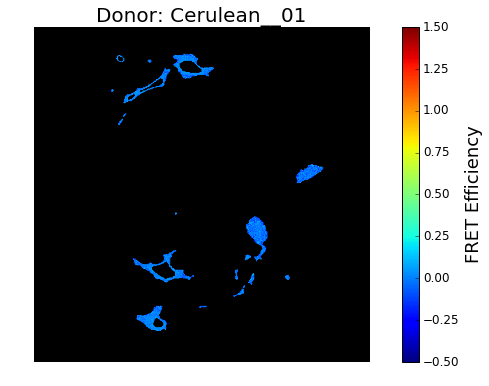

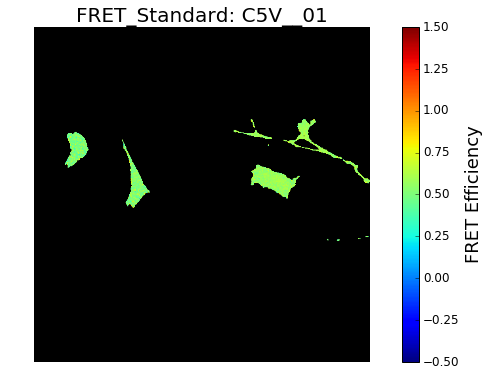

In [21]:
C.showImage(param='Eff',ex=2,mn=-.5,mx=1.5,specify=[['image','=',[0]]])


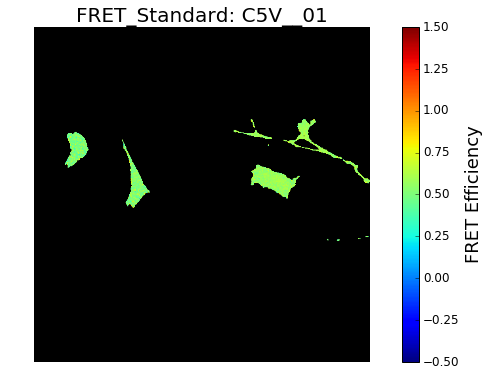

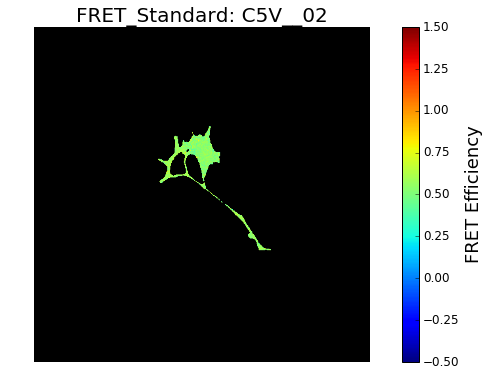

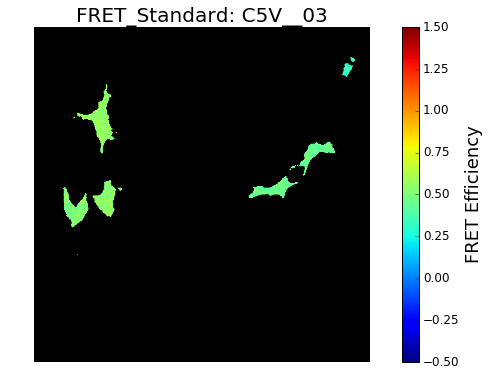

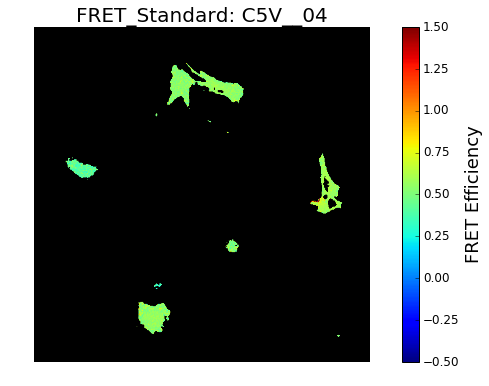

In [28]:
C.showImage(param='Eff',ex=2,mn=-.5,mx=1.5,specify=[['group','=',[3]]])

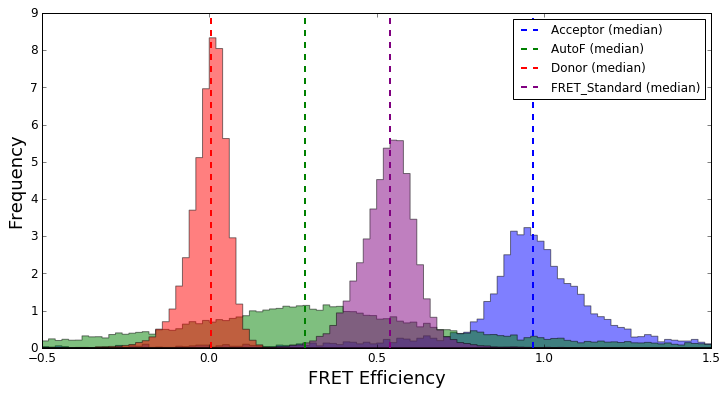

In [22]:
C.plotHistogram(param='Eff',ex=2,lim_x=[-.5,1.5],bins=100,norm=True,
                      observation='pixel',plot_by='group',specify=[],colors=[])


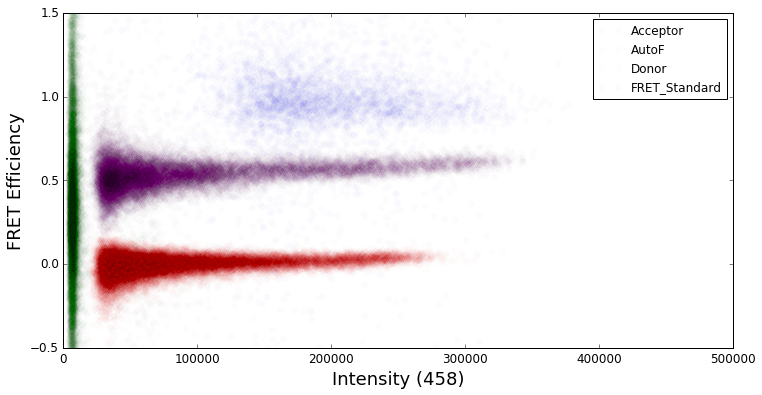

In [23]:
C.plotScatter(param_x='I',ex_x=2,param_y='Eff',ex_y=2,
                    lim_x=[0,5e5],lim_y=[-.5,1.5],observation='pixel',plot_by='group',
                    specify=[],colors=[],alpha=.01,fit=False,print_fit=False)


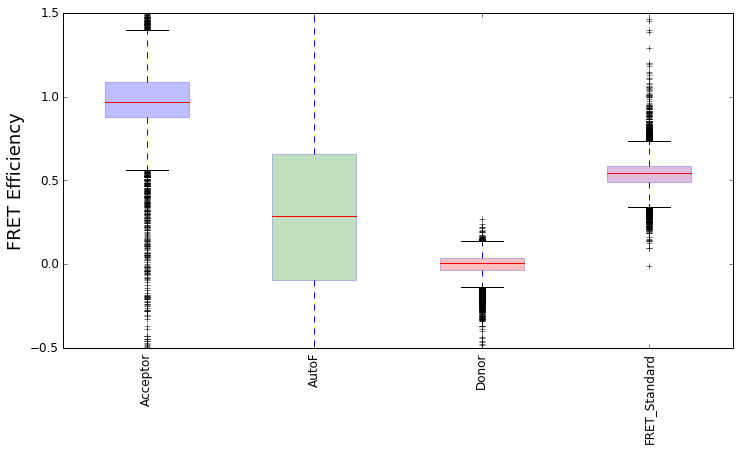

In [24]:
C.boxplot(param='Eff',ex=2,observation='pixel',plot_by='group',
                lim_y=[-.5,1.5],specify=[],colors=[],rotate_labels=90)


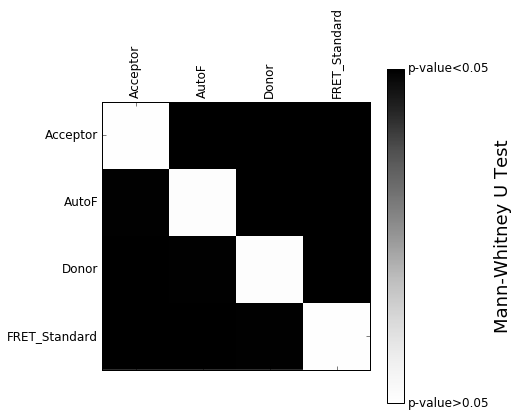

In [25]:
C.significance(param='Eff',ex=2,observation='pixel',plot_by='group',
                threshold=.05,test="Mann-Whitney U Test",print_pval=False,specify=[],colors=[])


In [26]:
C.create_calibration_DF(to_xlsx=True)


Write .xlsx calibration file? (True or False) True
Exporting


,0
Calibration_Name,Calib_Cerulean_Venus_405-458_6-1-2018
comps1,"[[0.0007760560895807067, 0.0, 0.0, 0.001463620..."
comps2,"[[0.0007760560895807067, 0.0, 0.0, 0.001463620..."
wl_em,"[416.0, 425.741935483871, 435.48387096774195, ..."
Ex1,405
Ex2,458
D_name,Cerulean
A_name,Venus
Qd,0.62
Qa,0.57


# Export .html file
The code in the following cell is based on Mac OSX commands and may need to be adjusted to work in Windows (mv=move in windows, etc)

In [27]:
export_command='jupyter nbconvert --to html pySensor_Calibration.ipynb'
rename_command='mv pySensor_Calibration.html CalibrationFiles/Calibration_xlsx/'+C.CalibName+'.html'
os.system(export_command)
os.system(rename_command)

0